#### machine learning preliminary experiment

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [10]:
shuffled = pd.read_pickle('../dataset/merged_data_shuffled_3class.pkl')
shuffled = shuffled[['AC026691.1','TMEM89','IRX3','MIR601','AL355303.1','end']]
# AL354855.1

train = shuffled[0:int(0.9*shuffled.shape[0])]
test = shuffled[int(0.9*shuffled.shape[0]):]

labels = np.array(shuffled['end'])
features = np.array(shuffled.drop(columns=['end']))
print(labels.shape)
print(features.shape)

train_y = np.array(train['end'])
train_x = np.array(train.drop(columns=['end']))
test_y = np.array(test['end'])
test_x = np.array(test.drop(columns=['end']))

X = features
Y = labels
print(Y)

(107,)
(107, 5)
[0 1 1 0 0 0 0 0 2 0 1 1 0 1 0 1 2 2 0 2 1 0 1 0 0 2 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 1 1 1 1 2 1 0 0 0 0 1 0 1 0 2 1 0 0 0 1 1 0 0 0 1 0 0 0 2 0 0 1
 0 0 1 0 0 0 0 2 0 0 1 1 1 2 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 2 1]


              precision    recall  f1-score   support

          re       0.75      1.00      0.86         6
         sym       1.00      0.50      0.67         4
         con       1.00      1.00      1.00         1

    accuracy                           0.82        11
   macro avg       0.92      0.83      0.84        11
weighted avg       0.86      0.82      0.80        11



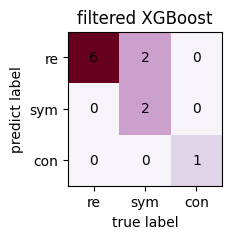

In [19]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import class_weight
# , sample_weight=compute_sample_weight("balanced", y)
model_name = 'XGBoost'

clf = xgb.XGBClassifier(n_jobs=-1)
#clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
#ax.set_yticklabels(labels=ax.get_yticklabels(), va='center')
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.71      0.83      0.77         6
         sym       1.00      0.50      0.67         4
         con       0.50      1.00      0.67         1

    accuracy                           0.73        11
   macro avg       0.74      0.78      0.70        11
weighted avg       0.80      0.73      0.72        11



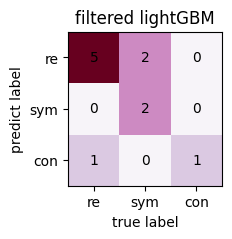

In [20]:
import lightgbm as lgb

model_name = 'lightGBM'

clf = lgb.LGBMClassifier(n_jobs=-1)
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.71      0.83      0.77         6
         sym       1.00      0.50      0.67         4
         con       0.50      1.00      0.67         1

    accuracy                           0.73        11
   macro avg       0.74      0.78      0.70        11
weighted avg       0.80      0.73      0.72        11



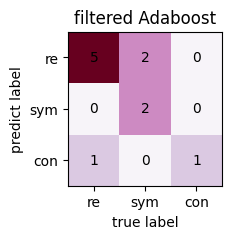

In [21]:
from sklearn.ensemble import AdaBoostClassifier

model_name = 'Adaboost'

clf = AdaBoostClassifier()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.75      1.00      0.86         6
         sym       1.00      0.50      0.67         4
         con       1.00      1.00      1.00         1

    accuracy                           0.82        11
   macro avg       0.92      0.83      0.84        11
weighted avg       0.86      0.82      0.80        11



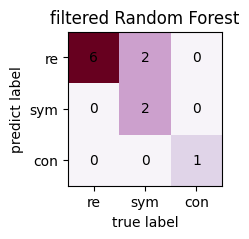

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_name = 'Random Forest'

clf = RandomForestClassifier()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)

#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       1.00      0.50      0.67         6
         sym       0.57      1.00      0.73         4
         con       1.00      1.00      1.00         1

    accuracy                           0.73        11
   macro avg       0.86      0.83      0.80        11
weighted avg       0.84      0.73      0.72        11



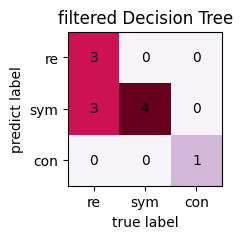

In [23]:
from sklearn.tree import DecisionTreeClassifier

model_name = 'Decision Tree'

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.75      0.50      0.60         6
         sym       0.67      0.50      0.57         4
         con       0.25      1.00      0.40         1

    accuracy                           0.55        11
   macro avg       0.56      0.67      0.52        11
weighted avg       0.67      0.55      0.57        11



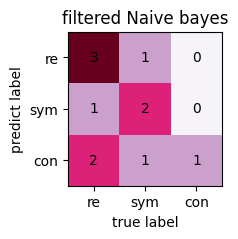

In [24]:
from sklearn.naive_bayes import GaussianNB

model_name = 'Naive bayes'

clf = GaussianNB()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       0.50      0.83      0.62         6
         sym       0.00      0.00      0.00         4
         con       0.00      0.00      0.00         1

    accuracy                           0.45        11
   macro avg       0.17      0.28      0.21        11
weighted avg       0.27      0.45      0.34        11



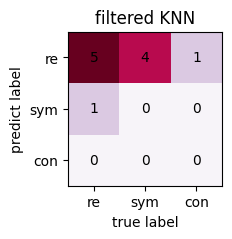

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model_name = 'KNN'

clf = KNeighborsClassifier()
clf.fit(train_x, train_y)
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

              precision    recall  f1-score   support

          re       1.00      0.17      0.29         6
         sym       0.75      0.75      0.75         4
         con       0.17      1.00      0.29         1

    accuracy                           0.45        11
   macro avg       0.64      0.64      0.44        11
weighted avg       0.83      0.45      0.45        11



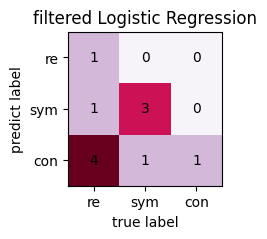

In [26]:
from sklearn.linear_model import LogisticRegression

model_name = 'Logistic Regression'

clf = LogisticRegression()
clf.fit(train_x, train_y, sample_weight=class_weight.compute_sample_weight("balanced", train_y))
result = clf.predict_proba(test_x)
#print(result)
y_pred = np.argmax(result,axis=1)

t = classification_report(test_y, y_pred, target_names=['re', 'sym', 'con'])
print(t)
confusion = confusion_matrix(test_y, y_pred)
ax = plt.figure(figsize=(2, 2))
#ax = sns.heatmap(confusion, fmt='.2f', cmap='Blues', annot=True)
ax = plt.imshow(confusion.T, cmap='PuRd')
indices = range(len(confusion))
classes = ['re', 'sym', 'con']
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.xlabel("true label")
plt.ylabel("predict label")
plt.title('filtered '  + model_name)

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],ha='center',va='center')
        #plt.text(first_index, second_index, np.round(float(confusion[first_index][second_index])/np.sum(confusion[first_index]),2),ha='center')
plt.savefig('../images/class3-feature2/CM_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()